In [1]:
import networkx as nx
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sbn
%matplotlib inline

In [2]:
sjo_file = "autosaveSJO.graphml"

In [3]:
sjo = nx.read_graphml(sjo_file)

In [4]:
actors = [node for node, nodedata in sjo.nodes(data=True) if nodedata['bipartite'] == 0]

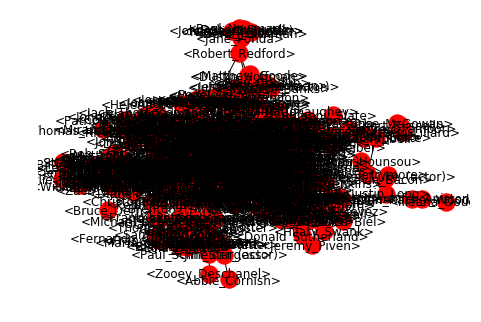

In [6]:
actorProjection = nx.bipartite.weighted_projected_graph(sjo, actors)
filtered = nx.Graph(actorProjection)

to_remove = [(n1, n2) for n1,n2,data in actorProjection.edges(data=True) if data['weight'] < 2]
filtered.remove_edges_from(to_remove)
giant_cc_nodes = max(nx.connected_components(filtered), key = len)
filtered2 = filtered.subgraph(giant_cc_nodes)

labels = {nodeId:data['label'] for nodeId, data in filtered2.nodes(data=True)}

nx.draw(filtered2, labels = labels)

nx.write_graphml(filtered2, "ScarletteJoActors.graphml")